<a href="https://colab.research.google.com/github/PranavSP0410/Handwritten-to-digit-recognition/blob/main/Handwritten_to_digit_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [ ]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [ ]:
print('How image looks like : ')
print(train_img[0])

How image looks like : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

In [ ]:
train_img=train_img/255.0
test_img=test_img/255.0

In [ ]:
print('How image looks like after normalising: ')
print(train_img[0])

How image looks like after normalising: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0. 

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

In [ ]:
#compiling the sequential model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=5, patience=4)
from tensorflow.keras.callbacks import ModelCheckpoint
x_train = train_img
y_train = train_lab
checkpoint =ModelCheckpoint(filepath="eeg.h5",
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            save_weights_only=False,
                            mode='auto',
                            save_freq='epoch')

model.fit(x_train, y_train, epochs=50, batch_size=8, validation_split=0.1, callbacks=[es, checkpoint] )

Epoch 1/50
   9/6750 [..............................] - ETA: 5:32 - loss: 2.0900 - accuracy: 0.0417

KeyboardInterrupt: ignored

In [ ]:
model.save('project.h5')

In [ ]:
from tensorflow import keras
#model = keras.models.load_model('/content/drive/MyDrive/ML_project/project.h5')
model = keras.models.load_model('project.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 1s - loss: 0.1338 - accuracy: 0.9752 - 1s/epoch - 4ms/step
Test Loss 0.1338474601507187
Test Accuracy 0.9751999974250793


In [ ]:

plt.imshow(test_img[5],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[5]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[5]))
if(test_lab[5]==(np.argmax(prediction[5]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 1s 4ms/step
Predicted Value:  2
Successful prediction


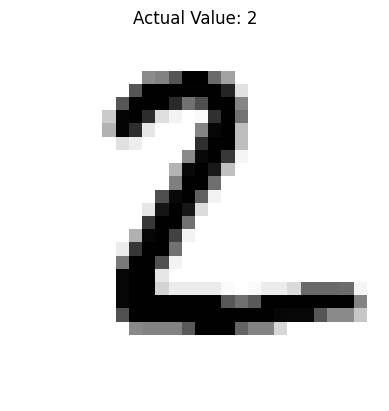

In [ ]:
plt.imshow(test_img[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[1]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(test_lab[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 1s 3ms/step
Predicted Value:  1
Successful prediction


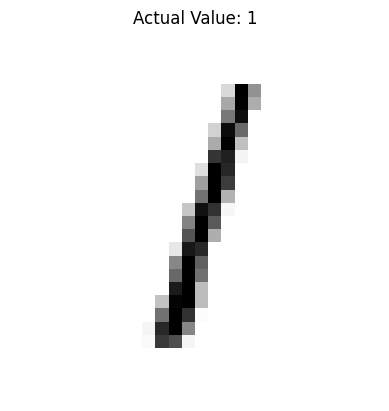

In [ ]:
plt.imshow(test_img[2],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[2]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[2]))
if(test_lab[2]==(np.argmax(prediction[2]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

In [ ]:
# make a prediction for a new image.
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 9.png to 9.png


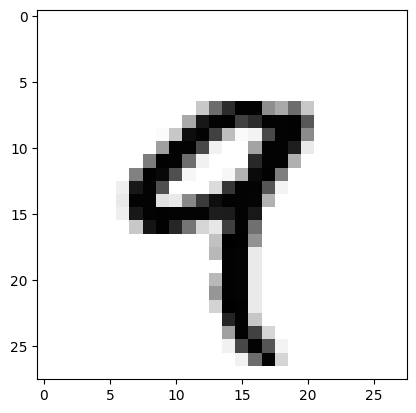

In [ ]:
from IPython.display import Image
import cv2
#Image('2.jpeg',width=250,height=250)
test_img = cv2.imread('9.png',cv2.IMREAD_GRAYSCALE)
#plt.imshow(test_img, cmap='gray')
img_resized = cv2.resize(test_img, (28, 28), interpolation=cv2.INTER_LINEAR)
img_resized = cv2.bitwise_not(img_resized)
plt.imshow(img_resized, cmap='gray')

In [ ]:
img_resized = img_resized.reshape(1,28,28)

In [ ]:
digit=model.predict(img_resized)
print('Predicted value : ',np.argmax(digit))

1/1 [==============================] - 0s 29ms/step
Predicted value :  9


In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: ignored

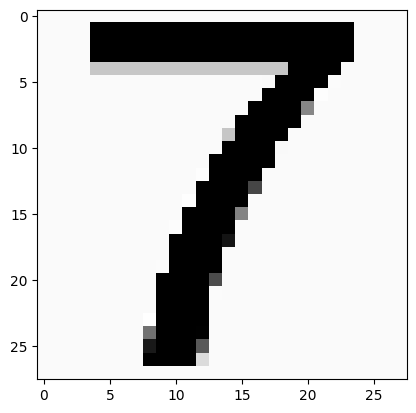

In [ ]:
from IPython.display import Image
import cv2
#Image('2.jpeg',width=250,height=250)
test_img = cv2.imread('7.png',cv2.IMREAD_GRAYSCALE)
#plt.imshow(test_img, cmap='gray')
img_resized = cv2.resize(test_img, (28, 28), interpolation=cv2.INTER_LINEAR)
#img_resized = cv2.bitwise_not(img_resized)
plt.imshow(img_resized, cmap='gray')


In [ ]:
img_resized = img_resized.reshape(1,28,28)
digit=model.predict(img_resized)
print('Predicted value : ',np.argmax(digit))

1/1 [==============================] - 0s 35ms/step
Predicted value :  9


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 4.png to 4.png


In [ ]:
img = load_image('4.png')
digit=model.predict(img)
print(np.argmax(digit))

1/1 [==============================] - 0s 27ms/step
5


In [ ]:
model=tf.keras.models.load_model('project1.h5')       # I have renamed the file as project1 in my PC